## Electric Vehicle Range and Routing using Azure Maps

Azure Maps is a set of geospatial service APIs that allow you to create location-aware solutions.  Specifically there is a set of [routing APIs](https://docs.microsoft.com/rest/api/maps/route) that allow us to calculate routes between several data points based on conditions like **vehicle type** and **reachable area**.  

In this notebook we develop a little app that lets an EV driver find the closest possible charging station.  

In [49]:
# vars to change

#if you need an AzMaps account or need to find your subscription key run one of the correct cell below
subscriptionKey = "N0WFUvexeNVGj7hycBkbdD23M1PsysGjUa8p7tRCdK4"
subscriptionName="davew demo"
currentLocation = [34.028115,-118.5184279]
currentLocation = [40.2204,-74.0121]  #asbury
currentLocation = [40.0362,-75.5138] #malvern



In [1]:
!az login

To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code F7YBQT7RY to authenticate.
[
  {
    "cloudName": "AzureCloud",
    "id": "5e624fe8-2b39-4cda-8a24-fdbd3d28cbfb",
    "isDefault": true,
    "name": "airs",
    "state": "Enabled",
    "tenantId": "72f988bf-86f1-41af-91ab-2d7cd011db47",
    "user": {
      "name": "davew@microsoft.com",
      "type": "user"
    }
  },
  {
    "cloudName": "AzureCloud",
    "id": "92031992-3c53-4d0b-aea8-b10ecc22a264",
    "isDefault": false,
    "name": "davew",
    "state": "Enabled",
    "tenantId": "72f988bf-86f1-41af-91ab-2d7cd011db47",
    "user": {
      "name": "davew@microsoft.com",
      "type": "user"
    }
  },
  {
    "cloudName": "AzureCloud",
    "id": "52061d21-01dd-4f9e-aca9-60fff4d67ee2",
    "isDefault": false,
    "name": "davew demo",
    "state": "Enabled",
    "tenantId": "72f988bf-86f1-41af-91ab-2d7cd011db47",
    "user": {
      "name": "davew@microsoft.com",
      "type": "user"


In [18]:
%%bash -s "$subscriptionName"
az account set --subscription "davew demo"
az account list --output table

Name                                  CloudName    SubscriptionId                        State    IsDefault
------------------------------------  -----------  ------------------------------------  -------  -----------
airs                                  AzureCloud   5e624fe8-2b39-4cda-8a24-fdbd3d28cbfb  Enabled  False
davew                                 AzureCloud   92031992-3c53-4d0b-aea8-b10ecc22a264  Enabled  False
davew demo                            AzureCloud   52061d21-01dd-4f9e-aca9-60fff4d67ee2  Enabled  True
Linux Microservices PROD              AzureCloud   02d68940-61e6-42d0-81d1-8396b7451114  Enabled  False
Microsoft Azure Internal Consumption  AzureCloud   43dd2144-e0d8-4d87-b889-6b820003e794  Enabled  False
Vul Analytics non-prod                AzureCloud   533b9f6b-47d9-4e13-9c7f-ed10e7099948  Enabled  False
JBender - MSFT Internal               AzureCloud   c74df6e4-9f8a-488c-90d2-2ded5686ef83  Enabled  False
PHLMTC Azure Subscription             AzureCloud   d620

In [47]:
%%bash 
# if you need to setup a new AzMaps account or need to determine your subscriptionkey then execute this cell
# if this gives a 403 forbidden then manually create the resources in the Azure portal
AzMapsName="azmaps"
ResGroup="rgAzMaps"
location="eastus2"

az group create --name $ResGroup --location $location

az provider register --namespace "Microsoft.Maps"

az maps account create \
    --name $AzMapsName \
    --resource-group $ResGroup \
    --accept-tos \
    --sku "S0"
    
az maps account keys list --name $AzMapsName --resource-group $ResGroup
echo "Make sure you copy the primarykey from the output to the variable in the correct cell above and run the cell"

{
  "id": "/subscriptions/52061d21-01dd-4f9e-aca9-60fff4d67ee2/resourceGroups/rgAzMaps",
  "location": "eastus2",
  "managedBy": null,
  "name": "rgAzMaps",
  "properties": {
    "provisioningState": "Succeeded"
  },
  "tags": null,
  "type": null
}
{
  "id": "/subscriptions/52061d21-01dd-4f9e-aca9-60fff4d67ee2/resourceGroups/rgAzMaps/providers/Microsoft.Maps/accounts/azmaps",
  "location": "global",
  "name": "azmaps",
  "properties": {
    "x-ms-client-id": "e5446bf2-c4be-4dbc-8b3c-bfd0bb26e18c"
  },
  "resourceGroup": "rgAzMaps",
  "sku": {
    "name": "s0",
    "tier": "Standard"
  },
  "tags": null,
  "type": "Microsoft.Maps/accounts"
}
{
  "id": "/subscriptions/52061d21-01dd-4f9e-aca9-60fff4d67ee2/resourceGroups/rgAzMaps/providers/Microsoft.Maps/accounts/azmaps",
  "primaryKey": "h4xAosAITHBJ9OdSRVmEot7GqibOzj12bFTKi6sMYAU",
  "primaryKeyLastUpdated": "2019-10-04T13:52:10.9408217Z",
  "resourceGroup": "rgAzMaps",
  "secondaryKey": "PSJH_D7mNfcScQ4ZpPmfYWP_LmyLBslRuomaL_k0-xA",
  

License (https://azure.microsoft.com/en-us/support/legal/) and 
Privacy Statement (https://privacy.microsoft.com/en-us/privacystatement).


In [31]:
## Basic Setup for this app, could also be done in requirements.txt

!pip install aiohttp

You should consider upgrading via the 'pip install --upgrade pip' command.


In [34]:
import time
import aiohttp
import urllib.parse
from IPython.display import Image, display

## Request the reachable range boundary

What is our maximum "reachable range" given the vehicle parameters

In [52]:
session.close()

<coroutine object ClientSession.close at 0x7f93681ecca8>

In [55]:
session = aiohttp.ClientSession()

# Parameters for the vehicle consumption model 
travelMode = "car"
vehicleEngineType = "electric"
currentChargeInkWh=45
maxChargeInkWh=80
timeBudgetInSec=550
routeType="eco"
constantSpeedConsumptionInkWhPerHundredkm="50,8.2:130,21.3"


# Get bounds for the electric vehicle's reachable range.
uri = "https://atlas.microsoft.com/route/range/json?subscription-key={}&api-version=1.0&query={}&travelMode={}&vehicleEngineType={}&currentChargeInkWh={}&maxChargeInkWh={}&timeBudgetInSec={}&routeType={}&constantSpeedConsumptionInkWhPerHundredkm={}".format(subscriptionKey,str(currentLocation[0])+","+str(currentLocation[1]),travelMode, vehicleEngineType, currentChargeInkWh, maxChargeInkWh, timeBudgetInSec, routeType, constantSpeedConsumptionInkWhPerHundredkm)
print (uri)
routeRangeResponse = await (await session.get("https://atlas.microsoft.com/route/range/json?subscription-key={}&api-version=1.0&query={}&travelMode={}&vehicleEngineType={}&currentChargeInkWh={}&maxChargeInkWh={}&timeBudgetInSec={}&routeType={}&constantSpeedConsumptionInkWhPerHundredkm={}"
                                              .format(subscriptionKey,str(currentLocation[0])+","+str(currentLocation[1]),travelMode, vehicleEngineType, currentChargeInkWh, maxChargeInkWh, timeBudgetInSec, routeType, constantSpeedConsumptionInkWhPerHundredkm))).json()


print (routeRangeResponse)

https://atlas.microsoft.com/route/range/json?subscription-key=N0WFUvexeNVGj7hycBkbdD23M1PsysGjUa8p7tRCdK4&api-version=1.0&query=40.0362,-75.5138&travelMode=car&vehicleEngineType=electric&currentChargeInkWh=45&maxChargeInkWh=80&timeBudgetInSec=550&routeType=eco&constantSpeedConsumptionInkWhPerHundredkm=50,8.2:130,21.3
{'formatVersion': '0.0.1', 'reachableRange': {'center': {'latitude': 40.03631, 'longitude': -75.51388}, 'boundary': [{'latitude': 40.06478, 'longitude': -75.51444}, {'latitude': 40.05888, 'longitude': -75.51772}, {'latitude': 40.05833, 'longitude': -75.52212}, {'latitude': 40.07364, 'longitude': -75.53297}, {'latitude': 40.07642, 'longitude': -75.53741}, {'latitude': 40.07056, 'longitude': -75.53618}, {'latitude': 40.06473, 'longitude': -75.54258}, {'latitude': 40.06323, 'longitude': -75.54842}, {'latitude': 40.05192, 'longitude': -75.53703}, {'latitude': 40.06046, 'longitude': -75.55841}, {'latitude': 40.05387, 'longitude': -75.56218}, {'latitude': 40.0536, 'longitude': -

In [56]:
# what's the polygon for the reachable range
polyBounds = routeRangeResponse["reachableRange"]["boundary"]

for i in range(len(polyBounds)):
    coordList = list(polyBounds[i].values())
    coordList[0], coordList[1] = coordList[1], coordList[0]
    polyBounds[i] = coordList

polyBounds.pop()
polyBounds.append(polyBounds[0])

boundsData = {
               "geometry": {
                 "type": "Polygon",
                 "coordinates": 
                   [
                      polyBounds
                   ]
                }
             }

In [57]:
# Search for EV stations within reachable range.
searchPolyResponse = await (await session.post(url = "https://atlas.microsoft.com/search/geometry/json?subscription-key={}&api-version=1.0&query=electric vehicle station&idxSet=POI&limit=50".format(subscriptionKey), json = boundsData)).json() 

reachableLocations = []
for loc in range(len(searchPolyResponse["results"])):
                location = list(searchPolyResponse["results"][loc]["position"].values())
                location[0], location[1] = location[1], location[0]
                reachableLocations.append(location)

In [58]:
rangeData = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          polyBounds
        ]
      }
    }
  ]
}

# Upload range data to Azure Maps data service.
uploadRangeResponse = await session.post("https://atlas.microsoft.com/mapData/upload?subscription-key={}&api-version=1.0&dataFormat=geojson".format(subscriptionKey), json = rangeData)

rangeUdidRequest = uploadRangeResponse.headers["Location"]+"&subscription-key={}".format(subscriptionKey)

while True:
    getRangeUdid = await (await session.get(rangeUdidRequest)).json()
    if 'udid' in getRangeUdid:
        break
    else:
        time.sleep(0.2)
rangeUdid = getRangeUdid["udid"]

In [59]:
poiData = {
    "type": "FeatureCollection",
    "features": [
      {
        "type": "Feature",
        "properties": {},
        "geometry": {
            "type": "MultiPoint",
            "coordinates": reachableLocations
        }
    }
  ]
}

# Upload EV charging stations data to Azure Maps data service.
uploadPOIsResponse = await session.post("https://atlas.microsoft.com/mapData/upload?subscription-key={}&api-version=1.0&dataFormat=geojson".format(subscriptionKey), json = poiData)

poiUdidRequest = uploadPOIsResponse.headers["Location"]+"&subscription-key={}".format(subscriptionKey)

while True:
    getPoiUdid = await (await session.get(poiUdidRequest)).json()
    if 'udid' in getPoiUdid:
        break
    else:
        time.sleep(0.2)
poiUdid = getPoiUdid["udid"]

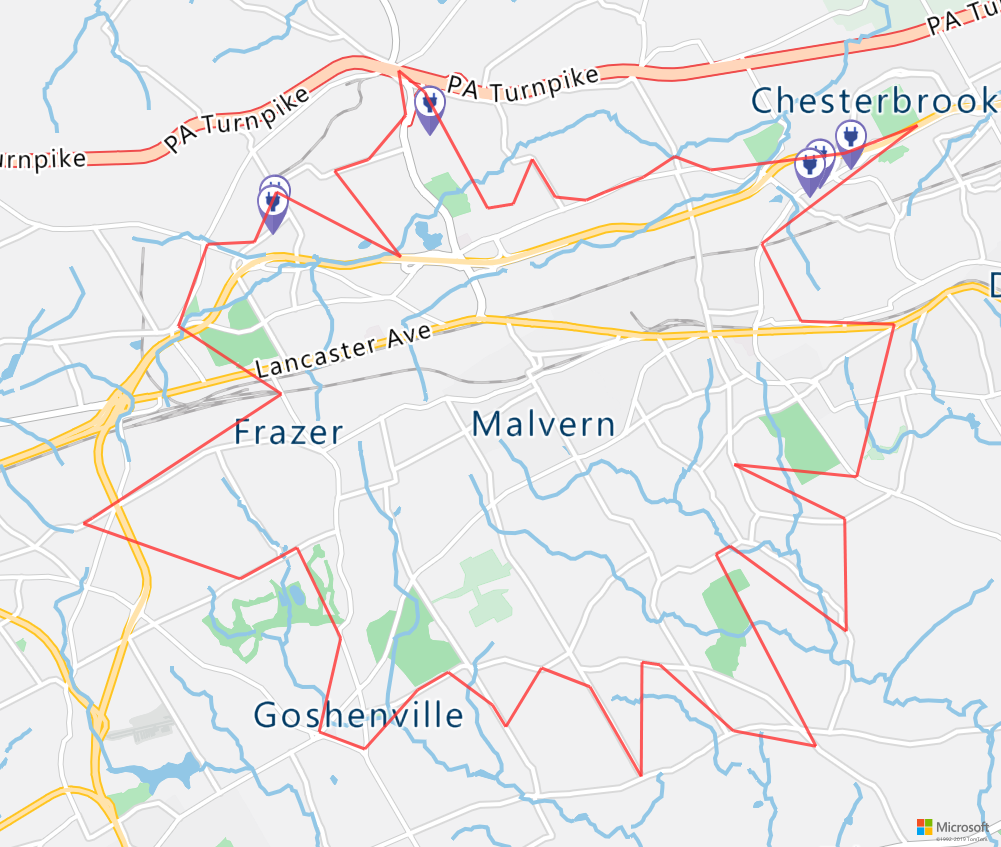

In [60]:
# Get bounds for bounding box.
def getBounds(polyBounds):
    maxLon = max(map(lambda x: x[0], polyBounds))
    minLon = min(map(lambda x: x[0], polyBounds))

    maxLat = max(map(lambda x: x[1], polyBounds))
    minLat = min(map(lambda x: x[1], polyBounds))
    
    # Buffer the bounding box by 10% to account for the pixel size of pins at the ends of the route.
    lonBuffer = (maxLon-minLon)*0.1
    minLon -= lonBuffer
    maxLon += lonBuffer

    latBuffer = (maxLat-minLat)*0.1
    minLat -= latBuffer
    maxLat += latBuffer
    
    return [minLon, maxLon, minLat, maxLat]

minLon, maxLon, minLat, maxLat = getBounds(polyBounds)

path = "lcff3333|lw3|la0.80|fa0.35||udid-{}".format(rangeUdid)
pins = "custom|an15 53||udid-{}||https://raw.githubusercontent.com/Azure-Samples/AzureMapsCodeSamples/master/AzureMapsCodeSamples/Common/images/icons/ev_pin.png".format(poiUdid)

encodedPins = urllib.parse.quote(pins, safe='')

# Render range and EV charging points on the map.
staticMapResponse =  await session.get("https://atlas.microsoft.com/map/static/png?api-version=1.0&subscription-key={}&pins={}&path={}&bbox={}&zoom=12".format(subscriptionKey,encodedPins,path,str(minLon)+", "+str(minLat)+", "+str(maxLon)+", "+str(maxLat)))

poiRangeMap = await staticMapResponse.content.read()

display(Image(poiRangeMap))

In [61]:
locationData = {
            "origins": {
              "type": "MultiPoint",
              "coordinates": [[currentLocation[1],currentLocation[0]]]
            },
            "destinations": {
              "type": "MultiPoint",
              "coordinates": reachableLocations
            }
         }


# Get the travel time and distance to every given charging station location.
searchPolyRes = await (await session.post(url = "https://atlas.microsoft.com/route/matrix/json?subscription-key={}&api-version=1.0&routeType=shortest&waitForResults=true".format(subscriptionKey), json = locationData)).json()

distances = []

for dist in range(len(reachableLocations)):
    distances.append(searchPolyRes["matrix"][0][dist]["response"]["routeSummary"]["travelTimeInSeconds"])

minDistLoc = []

minDistIndex = distances.index(min(distances))
minDistLoc.extend([reachableLocations[minDistIndex][1], reachableLocations[minDistIndex][0]])
closestChargeLoc = ",".join(str(i) for i in minDistLoc)

In [63]:
# Get route from current location to the closest charging station. 
routeResponse = await (await session.get("https://atlas.microsoft.com/route/directions/json?subscription-key={}&api-version=1.0&query={}:{}".format(subscriptionKey, str(currentLocation[0])+","+str(currentLocation[1]), closestChargeLoc))).json()

route = []
for loc in range(len(routeResponse["routes"][0]["legs"][0]["points"])):
                location = list(routeResponse["routes"][0]["legs"][0]["points"][loc].values())
                location[0], location[1] = location[1], location[0]
                route.append(location)

routeData = {
         "type": "LineString",
         "coordinates": route
     }

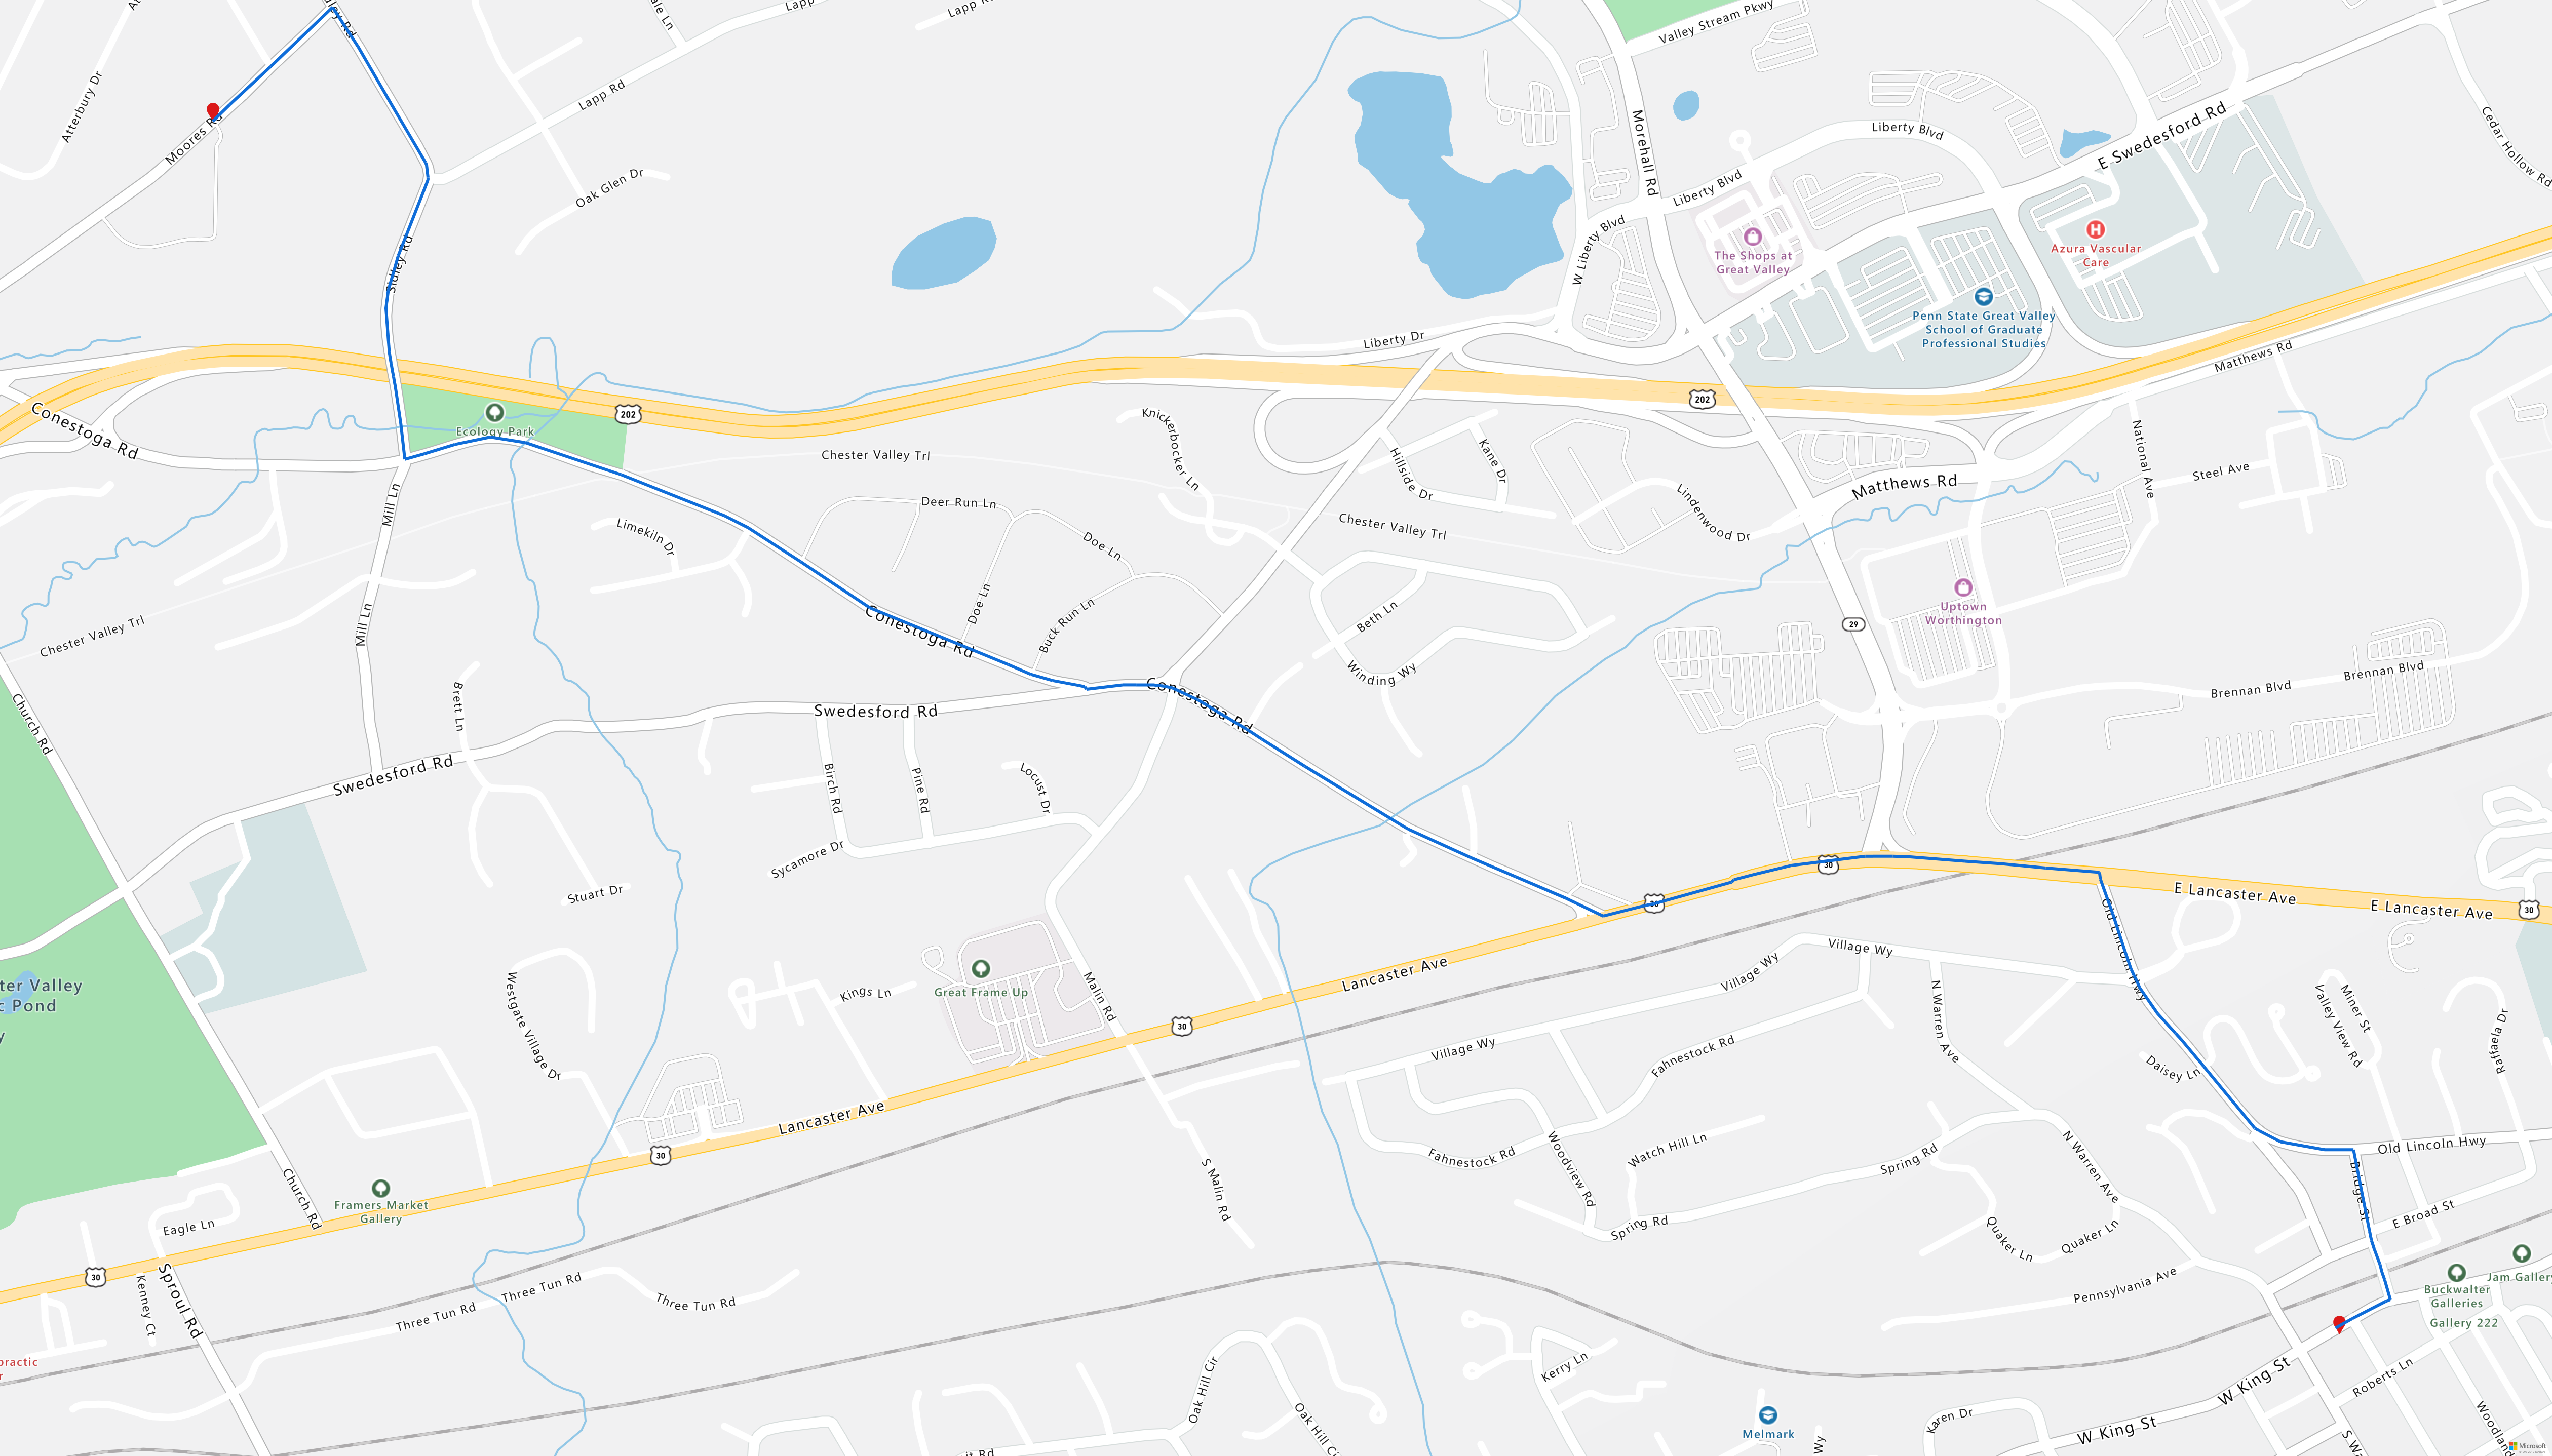

In [64]:
# Upload route data to Azure data service.
routeUploadRequest = await session.post("https://atlas.microsoft.com/mapData/upload?subscription-key={}&api-version=1.0&dataFormat=geojson".format(subscriptionKey), json = routeData)

udidRequestURI = routeUploadRequest.headers["Location"]+"&subscription-key={}".format(subscriptionKey)

while True:
    udidRequest = await (await session.get(udidRequestURI)).json()
    if 'udid' in udidRequest:
        break
    else:
        time.sleep(0.2)

udid = udidRequest["udid"]

destination = route[-1]

destination[1], destination[0] = destination[0], destination[1]

path = "lc0f6dd9|lw6||udid-{}".format(udid)
pins = "default|codb1818||{} {}|{} {}".format(str(currentLocation[1]),str(currentLocation[0]),destination[1],destination[0])


# Get bounds for bounding box.
minLat, maxLat = (float(destination[0]),currentLocation[0]) if float(destination[0])<currentLocation[0] else (currentLocation[0], float(destination[0]))
minLon, maxLon = (float(destination[1]),currentLocation[1]) if float(destination[1])<currentLocation[1] else (currentLocation[1], float(destination[1]))

#Buffer the bounding box by 10% to account for the pixel size of pins at the ends of the route.
lonBuffer = (maxLon-minLon)*0.1
minLon -= lonBuffer
maxLon += lonBuffer

latBuffer = (maxLat-minLat)*0.1
minLat -= latBuffer
maxLat += latBuffer

# Render route on the map.
staticMapResponse = await session.get("https://atlas.microsoft.com/map/static/png?api-version=1.0&subscription-key={}&&path={}&pins={}&bbox={}&zoom=16".format(subscriptionKey,path,pins,str(minLon)+", "+str(minLat)+", "+str(maxLon)+", "+str(maxLat)))

staticMapImage = await staticMapResponse.content.read()

await session.close()
display(Image(staticMapImage))